<a href="https://colab.research.google.com/github/gogowonji/Machine-Learning-with-Python/blob/main/ch2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,366 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install mglearn
import mglearn # github clone

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split

     |████████████████████████████████| 540 kB 6.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a91a02028fa6835f796bca7ed97971e38f0a7a53a0e8f6487da6b608a5f53853
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X,y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 클래스 이름 바꾸기
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# 그레디언트 부스팅 모델
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print(X_train[:6])
print(X_test[:6])
print(y_train_named[:12])
print(y_test_named[:12])
print(y_train[:6])
print(y_test[:6])

[[-0.69868661 -0.05917019]
 [-0.51680069 -0.64905973]
 [-0.46637452 -0.76338311]
 [ 0.2313728   0.71758564]
 [-0.15989763  0.65656872]
 [-0.81519726 -0.66222818]]
[[ 0.13179551 -0.53591877]
 [-0.71786926  0.03192209]
 [-0.36118825 -1.4007017 ]
 [ 0.94124669 -0.01979147]
 [ 0.26516411 -0.03906867]
 [-0.4522767  -0.01130911]]
['blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red'
 'blue' 'red']
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red']
[0 0 0 0 0 0]
[1 0 0 0 1 1]


In [7]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 shape:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 shape: (25,)


In [31]:
# 결정 함수 결과 중 앞 6개 확인
print("결정함수:\n", gbrt.decision_function(X_test)[:6])
# 양성 클래스(클래스 1)에 속한다고 믿는 정도 => 양수 : 양성 클래스(클래스1), 음수 : 음성 클래스(클래스2)

print("predict():\n", gbrt.predict(X_test)[:6])

결정함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]
predict():
 ['red' 'blue' 'blue' 'blue' 'red' 'red']


In [32]:
print("임계치와 결정 함수 결과 비교:\n", gbrt.decision_function(X_test) > 0)
print("예측값:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측값:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [26]:

# boolean값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# gbrt.decision_function(X_test)와 predict() 값 비교
print("decision_function는 예측 결과와 같다:", np.all(greater_zero == gbrt.predict(X_test)))
# classes_ 인덱스값으로 사용
pred = gbrt.classes_[greater_zero]
# pred predict()의 값 비교
print("pred는 예측 결과와 같다:", np.all(pred == gbrt.predict(X_test)))


decision_function는 예측 결과와 같다: False
pred는 예측 결과와 같다: True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [27]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


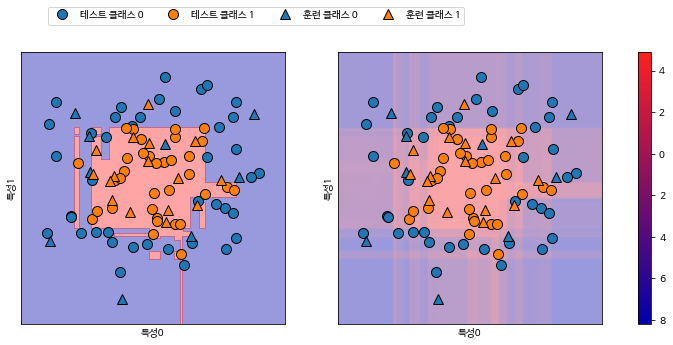

In [47]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
  # 클래스가 두개니까 25,0 25,1 두개로 나누어서
  mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
  mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
  ax.set_xlabel("특성0")
  ax.set_ylabel("특성1")

# 컬러바
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()

axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

In [49]:
print("예측 확률 결과 shape:", gbrt.predict_proba(X_test).shape)

예측 확률 결과 shape: (25, 2)


In [51]:
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


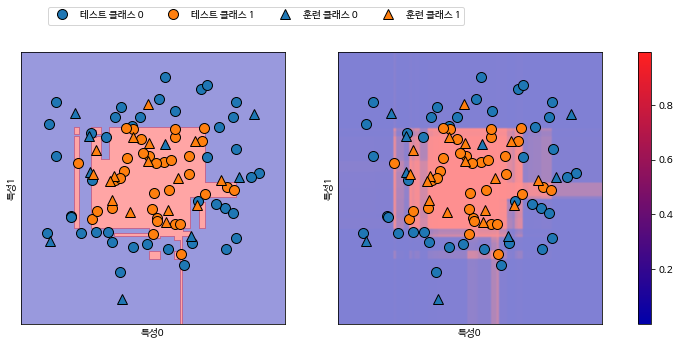

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
  mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
  mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
  ax.set_xlabel("특성0")
  ax.set_ylabel("특성1")

# 컬러바
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()

axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0", "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))


In [55]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 shape:", gbrt.decision_function(X_test).shape)
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6,:])


결정 함수의 결과 shape: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [64]:
print("가장 큰 결정 함수의 인덱스:\n", np.argmax(gbrt.decision_function(X_test),axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [66]:
print("예측확률:\n", gbrt.predict_proba(X_test)[:6])
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [67]:
print("가장 큰 예측 확률의 인덱스:\n", np.argmax(gbrt.predict_proba(X_test),axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classes_에 연결:", logreg.classes_[argmax_dec_func][:10])
print("\n")

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
